In [86]:
# Analysis wheter or not the numerical solvers will converge toward the origin when μ<1 

In [87]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random

In [119]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 3 methods)

In [89]:
## parameter values
θ = 10.0; β = 8/3; μ = 1/2 # μ<1
tim = 1000
Δt = 0.001
r_vals = [100 250 500 750 1000]

1×5 Matrix{Int64}:
 100  250  500  750  1000

In [120]:
# Runga-Kutta 4
function RungeKutta4(Δt, tim, x̄₀, p)
    tsteps_RK = Int(tim/Δt)
    x̄=x̄₀
    XRK = zeros(3,tsteps_RK)
    for i=1:tsteps_RK
        x̄=RK4(p,x̄,Δt)
        XRK[:,i] = x̄
    end
    return XRK
end

RungeKutta4 (generic function with 1 method)

In [121]:
# Percentage of converging dots

function Percentage_of_Convergence(r_vals, θ, μ, β, nr_of_dots, ẋ::Function)

    for r in r_vals

        dots = zeros(3, nr_of_dots)
        for i=1:nr_of_dots
            dot = rand(-1.0:0.001:1.0,(1,3))
            dot = r*dot./norm(dot)
            dots[:,i] = dot
        end

        Δt = 0.01
        conv = zeros(nr_of_dots)
        tol = 0.1
        for i=1:nr_of_dots
            x̄=dots[:,i]
            while norm(x̄) > tol && norm(x̄) < 1000*r
                x̄=ẋ([θ,μ,β],x̄,Δt)
            end
            if norm(x̄) < tol
                conv[i] = 1
            else 
                conv[i] = 0
            end
        end
        println("Percentage of converging dots", " r = ", r, " : ", sum(conv)/nr_of_dots)
    end
end



Percentage_of_Convergence (generic function with 3 methods)

In [122]:
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, EulerForward)
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, RK4)

Percentage of converging dots r = 100 : 0.0726


Percentage of converging dots r = 250 : 0.0004


Percentage of converging dots r = 500 : 0.0


Percentage of converging dots r = 750 : 0.0
Percentage of converging dots r = 1000 : 0.0


Percentage of converging dots r = 100 : 1.0


Percentage of converging dots r = 250 : 1.0


Percentage of converging dots r = 500 : 0.7757


Percentage of converging dots r = 750 : 0.4093


Percentage of converging dots r = 1000 : 0.2745


In [91]:
# intial positions
r = 100
nr_of_dots = 10
dots = zeros(3, nr_of_dots)
for i=1:nr_of_dots
    dot = rand(-1.0:0.001:1.0,(1,3))
    dot = r*dot./norm(dot)
    dots[:,i] = dot
end


In [92]:
Δt = 0.01
XRK_Gigantic = zeros(nr_of_dots,3,Int(tim/Δt))
for i=1:nr_of_dots
    x̄₀ = dots[:,i]
    XRK_Gigantic[i,:,:] = RungeKutta4(Δt, tim, x̄₀, [θ,μ,β])
end

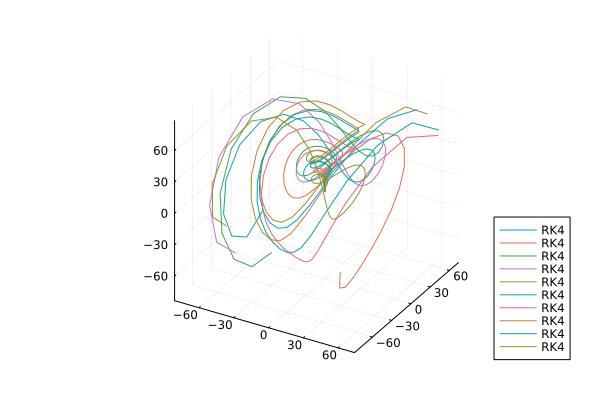

In [93]:
plot(XRK_Gigantic[1,1,:],XRK_Gigantic[1,2,:],XRK_Gigantic[1,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[2,1,:],XRK_Gigantic[2,2,:],XRK_Gigantic[2,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[3,1,:],XRK_Gigantic[3,2,:],XRK_Gigantic[3,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[4,1,:],XRK_Gigantic[4,2,:],XRK_Gigantic[4,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[5,1,:],XRK_Gigantic[5,2,:],XRK_Gigantic[5,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[6,1,:],XRK_Gigantic[6,2,:],XRK_Gigantic[6,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[7,1,:],XRK_Gigantic[7,2,:],XRK_Gigantic[7,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[8,1,:],XRK_Gigantic[8,2,:],XRK_Gigantic[8,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[9,1,:],XRK_Gigantic[9,2,:],XRK_Gigantic[9,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[10,1,:],XRK_Gigantic[10,2,:],XRK_Gigantic[10,3,:],label="RK4",legend=:bottomright)

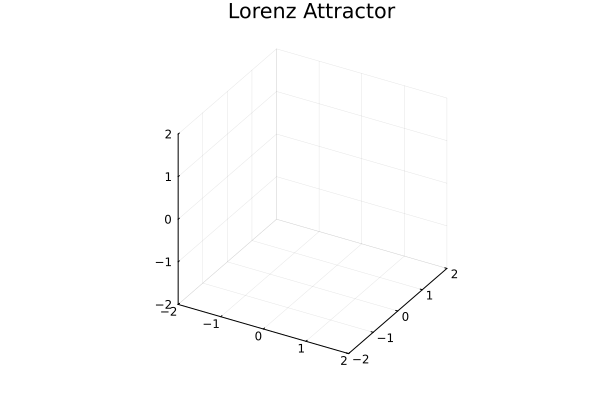

In [94]:
plt = plot3d(
    1,
    xlim = (-2, 2),
    ylim = (-2, 2),
    zlim = (-2, 2),
    title = "Lorenz Attractor",
    legend = false,
    #marker = 2,
)

for i=1:nr_of_dots
    push!(plt,XRK_Gigantic[i,1,:],XRK_Gigantic[i,2,:],XRK_Gigantic[i,3,:])
end
plt

In [97]:
#DTM
Δt_DTM = 0.0001
tsteps_DTM = Int(tim/Δt_DTM)
x̄=x̄₀
terms=20
XDTM = zeros(3,tsteps_DTM)
for i=1:tsteps_DTM
    x̄=DTM([θ,μ,β],x̄,terms, Δt_DTM)
    XDTM[:,i] = x̄
end
print(x̄)

InterruptException: InterruptException: